# Sarcasm Detection

This model detects the sarcasm from the given news headline in the dataset

Dataset : https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection



## Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Model Variables

In [6]:
vocab_size = 20000
embedding_dim = 200
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [7]:
df = pd.read_json('sample_data/Sarcasm_Headlines_Dataset_v2.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [8]:
df.shape

(28619, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


**This shows that the dataset contains no null values**

## Training and Testing Data

In [10]:
sentences = df['headline']
labels = df['is_sarcastic']
urls = df['article_link']

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Tokenizer

In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [12]:
# Training and Testing sequences

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Model 

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 200)          4000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          135680    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,244,865
Trainable params: 4,244,865
Non-trainable params: 0
______________________________________________

In [14]:
num_epochs = 20
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [15]:
history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/20
625/625 [==============================] - 107s 172ms/step - loss: 0.3834 - accuracy: 0.8227 - val_loss: 0.3074 - val_accuracy: 0.8689
Epoch 2/20
625/625 [==============================] - 107s 171ms/step - loss: 0.1473 - accuracy: 0.9444 - val_loss: 0.3605 - val_accuracy: 0.8560
Epoch 3/20
625/625 [==============================] - 106s 170ms/step - loss: 0.0568 - accuracy: 0.9808 - val_loss: 0.4659 - val_accuracy: 0.8508
Epoch 4/20
625/625 [==============================] - 106s 169ms/step - loss: 0.0277 - accuracy: 0.9901 - val_loss: 0.6370 - val_accuracy: 0.8545
Epoch 5/20
625/625 [==============================] - 106s 170ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.7994 - val_accuracy: 0.8443
Epoch 6/20
625/625 [==============================] - 107s 172ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.7894 - val_accuracy: 0.8463
Epoch 7/20
625/625 [==============================] - 106s 170ms/step - loss: 0.0072 - accuracy: 0.9973 - val_loss: 1.0841 -

In [26]:
np.mean(history.history['val_accuracy'])

0.8430966436862946

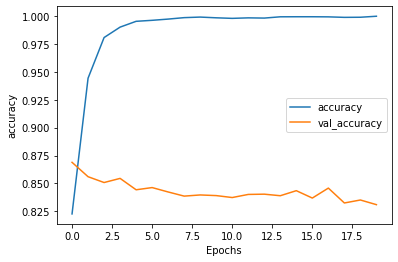

In [25]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')